In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px
import warnings

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80
warnings.filterwarnings('ignore')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv', low_memory=False)
chapinero =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'CHAPINERO') & (apartments['coords_modified'] == False)]
chapinero = chapinero.drop(columns=['precio_arriendo'])
chapinero.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
6,3390-M4320821,APARTAMENTO,VENTA,3.670000e+09,432.00,4.0,5.0,3000000.0,4.0,CHICO,...,0.0,0.0,1.0,1.0,False,CHAPINERO,S.C. EL NOGAL,Héroes - Gel´Hada,960.91,0
17,897-M4156030,APARTAMENTO,VENTA,3.900000e+08,40.00,1.0,2.0,NaN,1.0,CHAPINERO ALTO,...,0.0,0.0,1.0,0.0,False,CHAPINERO,S.C. CHAPINERO CENTRAL,Calle 57,242.21,1
18,11301-1492,APARTAMENTO,VENTA,2.100000e+09,350.00,3.0,4.0,2040000.0,3.0,OTROS,...,0.0,1.0,1.0,0.0,False,CHAPINERO,CHICO ORIENTAL,Calle 85,2151.16,0
19,11013-M4424136,APARTAMENTO,VENTA,8.450000e+08,138.96,3.0,4.0,1170000.0,2.0,CHICO,...,0.0,0.0,1.0,0.0,False,CHAPINERO,S.C. CHICO NORTE,Virrey,1115.25,0
20,293-M3798297,APARTAMENTO,VENTA,1.700000e+09,178.00,3.0,4.0,1128000.0,3.0,CHAPINERO ALTO,...,0.0,1.0,1.0,0.0,False,CHAPINERO,ZAMUDIO,Flores,1138.96,0


In [4]:
chapinero.datetime = pd.to_datetime(chapinero.datetime)
chapinero.fecha_actualizacion_precio_venta = pd.to_datetime(chapinero.fecha_actualizacion_precio_venta)

In [5]:
chapinero.shape

(11067, 39)

In [6]:
chapinero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11067 entries, 6 to 69558
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   codigo                               11067 non-null  object        
 1   tipo_propiedad                       11067 non-null  object        
 2   tipo_operacion                       11067 non-null  object        
 3   precio_venta                         11067 non-null  float64       
 4   area                                 11067 non-null  float64       
 5   habitaciones                         11067 non-null  float64       
 6   banos                                11067 non-null  float64       
 7   administracion                       10077 non-null  float64       
 8   parqueaderos                         11067 non-null  float64       
 9   sector                               10641 non-null  object        
 10  estrato        

In [7]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'last_view',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'direccion', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [8]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

Eliminamos los precios que son outliers

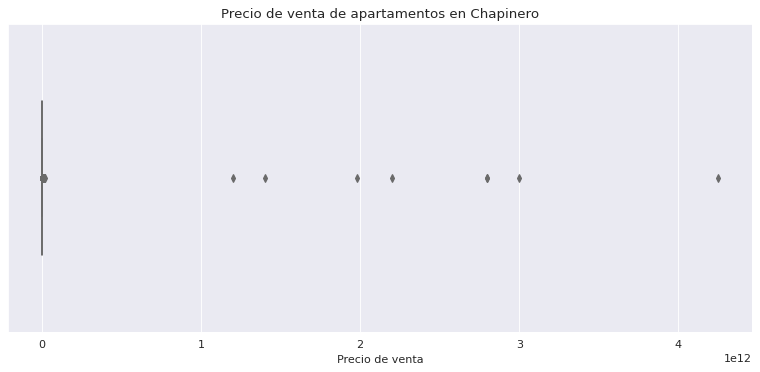

In [9]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

In [10]:
Q1 = chapinero['precio_venta'].quantile(0.25)
Q3 = chapinero['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
if lower < 0:
    lower = Q1 - (0.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = chapinero[(chapinero['precio_venta'] < lower) | (chapinero['precio_venta'] > upper)]
outliers.shape

(542, 39)

In [11]:
chapinero = chapinero[(chapinero['precio_venta'] > lower) & (chapinero['precio_venta'] < upper)]
chapinero.shape

(10525, 39)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [12]:
# eliminar area igual a 0

chapinero = chapinero[chapinero['area'] > 0]

Eliminamos las areas (m2) que son outliers

In [13]:
Q1 = chapinero['area'].quantile(0.25)
Q3 = chapinero['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = chapinero[(chapinero['area'] < lower) | (chapinero['area'] > upper)]
outliers.shape

(126, 39)

In [14]:
chapinero = chapinero[(chapinero['area'] > lower) & (chapinero['area'] < upper)]
chapinero.shape

(10362, 39)

### Analisis

In [15]:
chapinero.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
area,"10,362.0",167.4727012159815,85.54959560198209,1.0,98.0,157.0,227.0,425.0


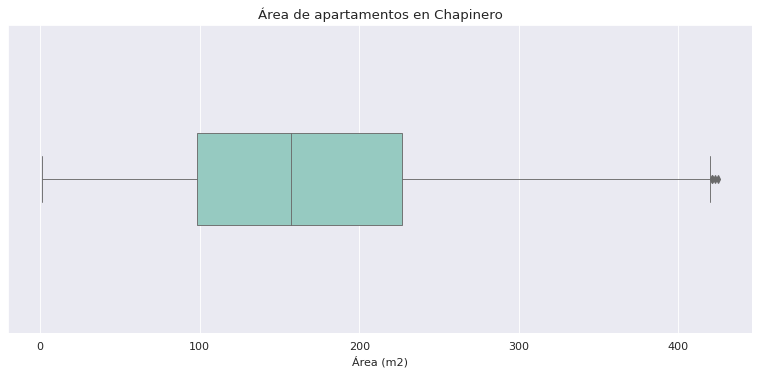

In [16]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=chapinero,
    x='area',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

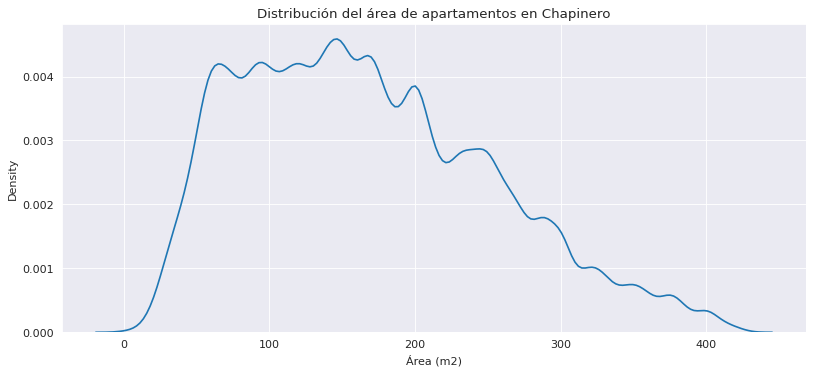

In [17]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

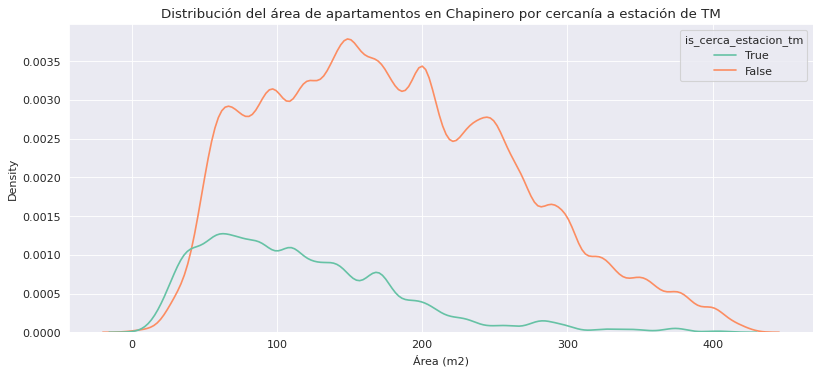

In [18]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

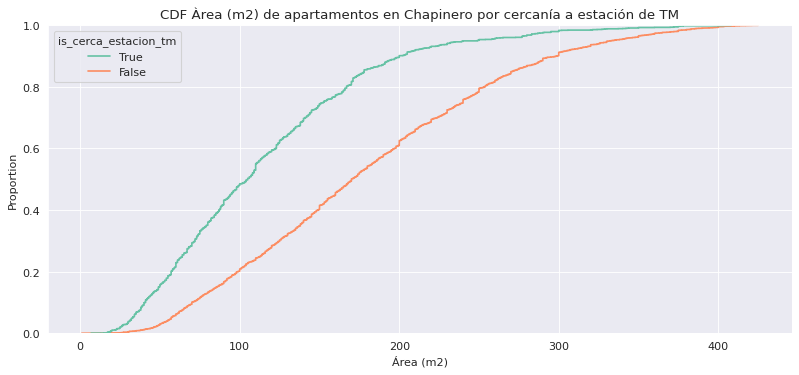

In [19]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('CDF Àrea (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [20]:
chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,9.0,230.3,122.3,108.0,120.0,176.0,370.0,400.0
1.0,18.0,145.4,76.8,29.0,94.1,136.6,168.3,361.0
2.0,9.0,87.6,99.3,27.0,30.0,43.0,76.2,325.0
3.0,221.0,62.9,42.7,6.9,37.0,47.0,75.5,280.0
4.0,996.0,86.0,51.8,14.0,52.4,72.0,101.2,343.0
5.0,1046.0,131.7,66.5,17.0,83.0,118.0,170.0,420.0
6.0,8056.0,185.1,82.5,1.0,122.2,175.0,241.5,425.0


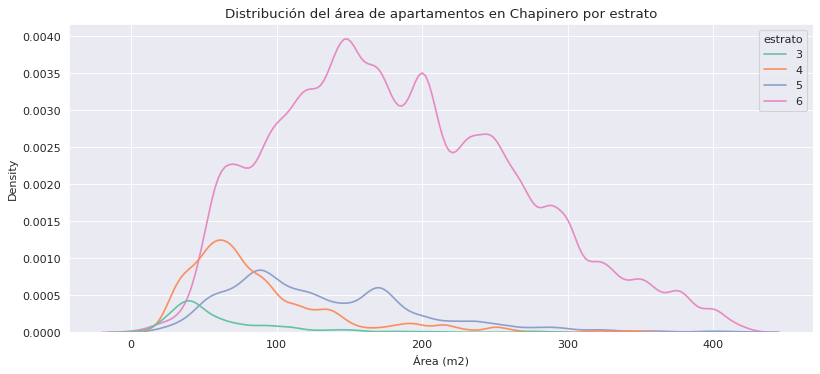

In [21]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

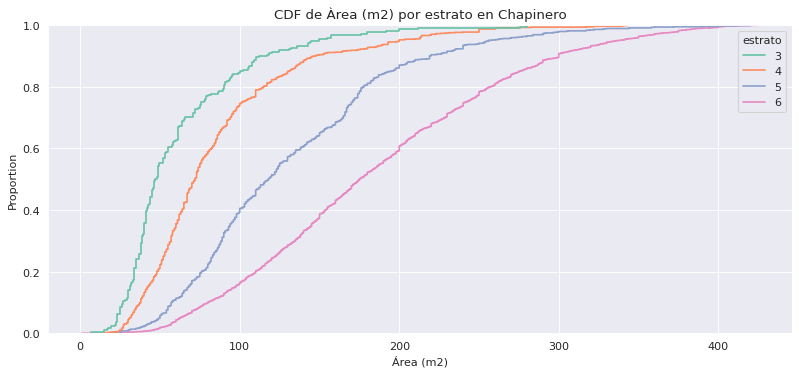

In [22]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('CDF de Àrea (m2) por estrato en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [23]:
chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1587.0,131.6,78.3,1.0,65.0,122.6,179.0,404.0
ENTRE 10 Y 20 ANOS,2233.0,167.6,85.5,8.0,98.0,159.0,228.0,417.0
ENTRE 5 Y 10 ANOS,1695.0,153.0,81.5,6.9,84.0,140.0,205.0,412.0
MAS DE 20 ANOS,4439.0,183.3,84.1,4.0,117.0,172.0,240.0,423.0
REMODELADO,403.0,194.2,90.6,26.0,125.5,194.0,250.0,425.0


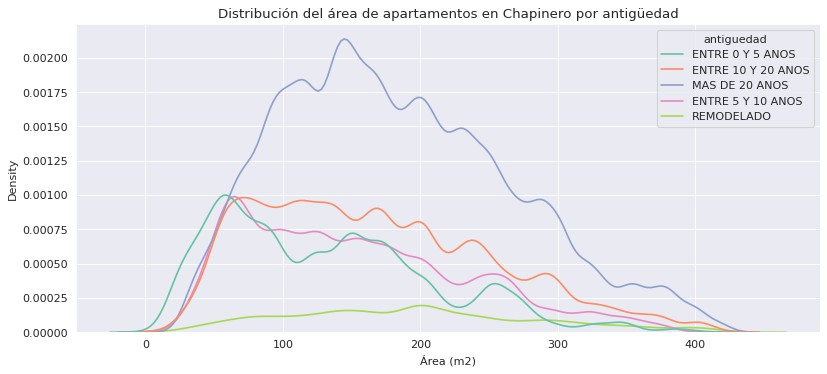

In [24]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

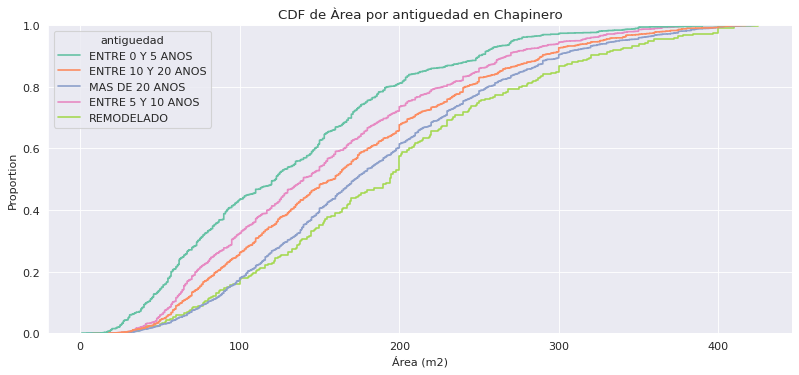

In [25]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de Àrea por antiguedad en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

Lo apartamentos mas recientes tienden a tener un Àrea menor que los mas antiguos

### Estacion de TM Cercana

In [26]:
estacion_tm_cercana = chapinero[chapinero['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Héroes - Gel´Hada,23.0,157.1,98.8,48.0,98.0,116.0,179.0,403.0
Virrey,416.0,146.0,74.0,38.0,86.8,131.0,198.2,408.0
Calle 85,393.0,127.4,54.6,31.8,85.0,122.0,166.0,400.0
Calle 100,515.0,126.8,64.7,17.0,77.0,121.0,159.5,378.0
Flores,37.0,109.7,68.3,30.0,61.0,100.0,132.0,370.0
Calle 72,25.0,109.3,65.4,40.0,66.7,77.9,155.0,260.0
Calle 76 - San Felipe,50.0,102.1,58.5,17.1,55.0,99.0,126.5,321.2
AV. 39,28.0,78.3,35.7,29.0,50.4,74.0,115.1,134.2
Calle 45,78.0,75.8,43.9,29.0,38.5,61.0,99.8,193.0


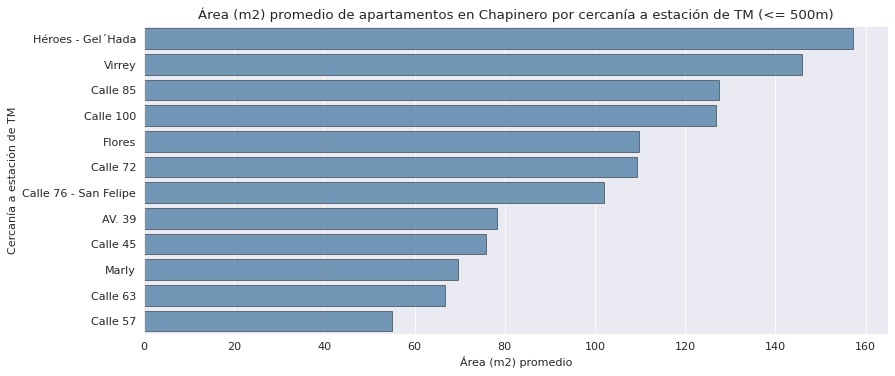

In [27]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

In [28]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='50%', ascending=False)

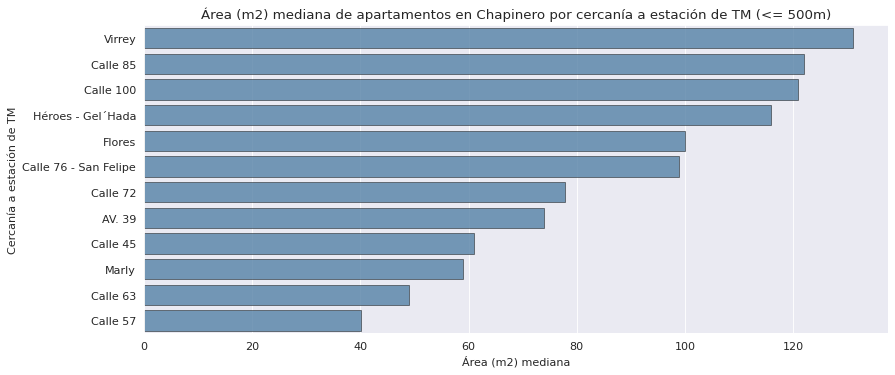

In [29]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='50%',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Área (m2) mediana de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) mediana')
plt.ylabel('Cercanía a estación de TM')
plt.show()

<Figure size 960x400 with 0 Axes>

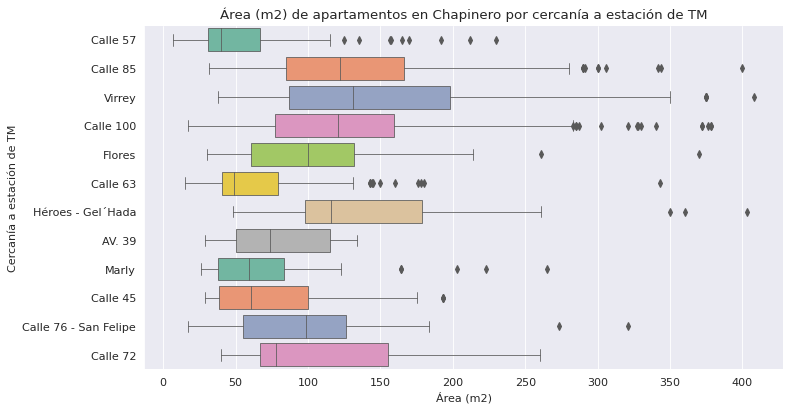

In [30]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

## Precio de venta

In [31]:
chapinero.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,10.4 thousand,1.4 billion,860.5 million,150.0 million,720.0 million,1.2 billion,1.9 billion,4.0 billion


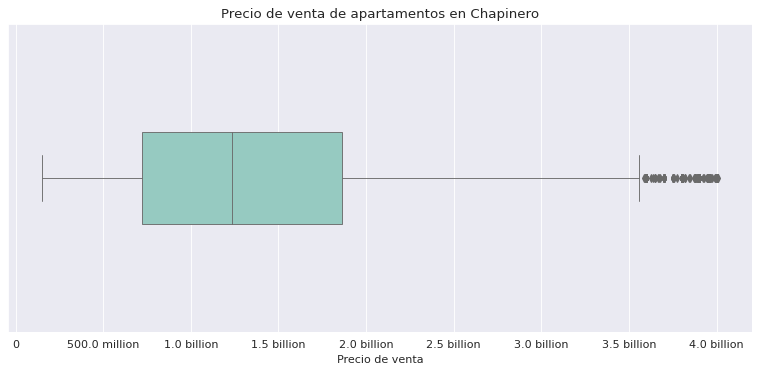

In [32]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.3,
    palette='Set3',
    linewidth=.8,
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

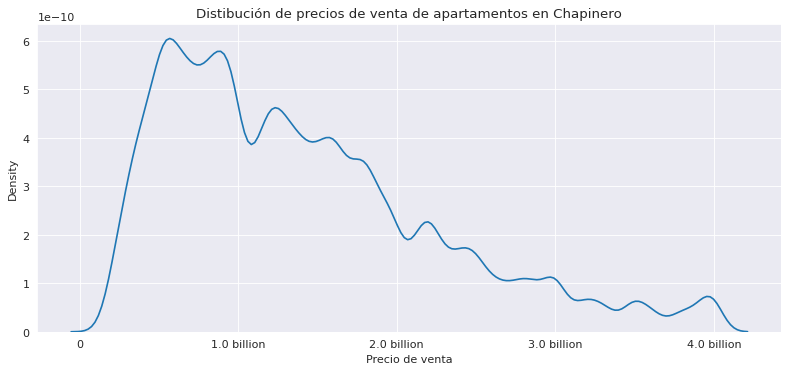

In [33]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Barrios

In [34]:
top_barrios = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios_mean = top_barrios[top_barrios['count'] > 22].sort_values('mean', ascending=False).head(10)
top_barrios_mean.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LA CABRERA,505,2.1 billion,2.0 billion,851.8 million
URB. BELMONTE,23,2.1 billion,2.0 billion,706.1 million
S.C. EL RETIRO,207,2.0 billion,1.9 billion,942.5 million
CHICO ORIENTAL,202,2.0 billion,1.8 billion,869.3 million
PINAR ALTO - PINAR II,45,1.9 billion,1.6 billion,777.3 million
CHICO ALTO,168,1.9 billion,1.7 billion,708.5 million
ALTOS DE BELLAVISTA,27,1.9 billion,1.6 billion,764.6 million
BOSQUE EL RETIRO I SECTOR,249,1.8 billion,1.6 billion,891.1 million
S.C. EL BAGAZAL,34,1.8 billion,1.5 billion,826.2 million


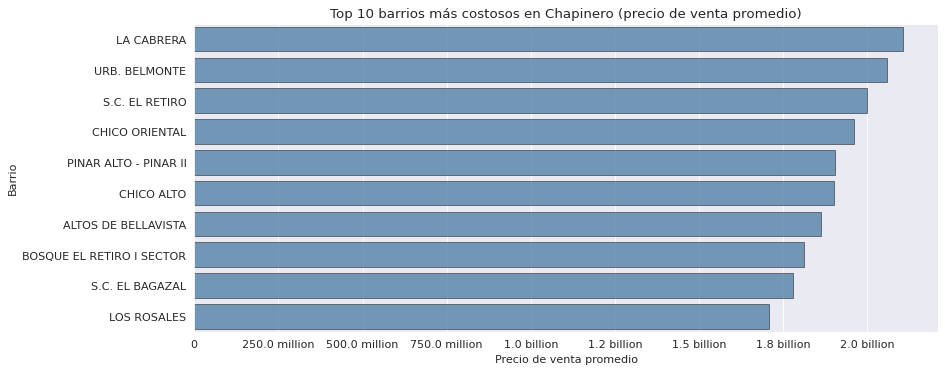

In [35]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_mean,
    y=top_barrios_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [36]:
top_barrios_median = top_barrios[top_barrios['count'] > 22].sort_values('median', ascending=False).head(10)
top_barrios_median.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LA CABRERA,505,2.1 billion,2.0 billion,851.8 million
URB. BELMONTE,23,2.1 billion,2.0 billion,706.1 million
S.C. EL RETIRO,207,2.0 billion,1.9 billion,942.5 million
CHICO ORIENTAL,202,2.0 billion,1.8 billion,869.3 million
CHICO ALTO,168,1.9 billion,1.7 billion,708.5 million
ZAMUDIO,54,1.5 billion,1.7 billion,601.5 million
PINAR ALTO - PINAR II,45,1.9 billion,1.6 billion,777.3 million
SIERRAS DEL CHICO,25,1.6 billion,1.6 billion,713.1 million
BOSQUE EL RETIRO I SECTOR,249,1.8 billion,1.6 billion,891.1 million


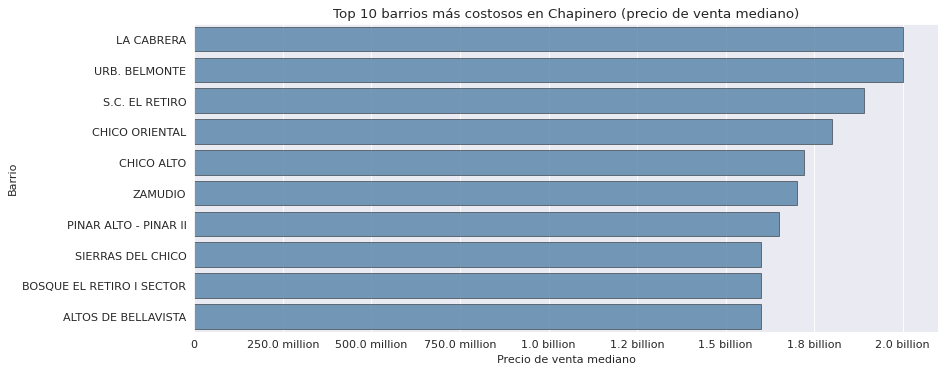

In [37]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_median,
    y=top_barrios_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [38]:
top_barrios_economicos = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
)

top_barrios_economicos_mean = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('mean', ascending=True).head(10)
top_barrios_economicos_mean.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LOS OLIVOS,19,310.2 million,245.0 million,222.5 million
S.C. CHAPINERO CENTRAL,239,354.2 million,320.0 million,168.6 million
S.C. SUCRE,61,396.8 million,350.0 million,170.6 million
S.C. MARLY,67,425.3 million,337.0 million,348.9 million
S.C. CATALUNA,21,446.8 million,410.0 million,215.1 million
S.C. PARDO RUBIO,135,475.8 million,420.0 million,356.6 million
S.C. CHAPINERO NORTE,80,489.2 million,455.0 million,212.6 million
S.C. LA SALLE,106,511.7 million,470.0 million,184.1 million
S.C. BOSQUE CALDERON,117,539.4 million,500.0 million,226.5 million


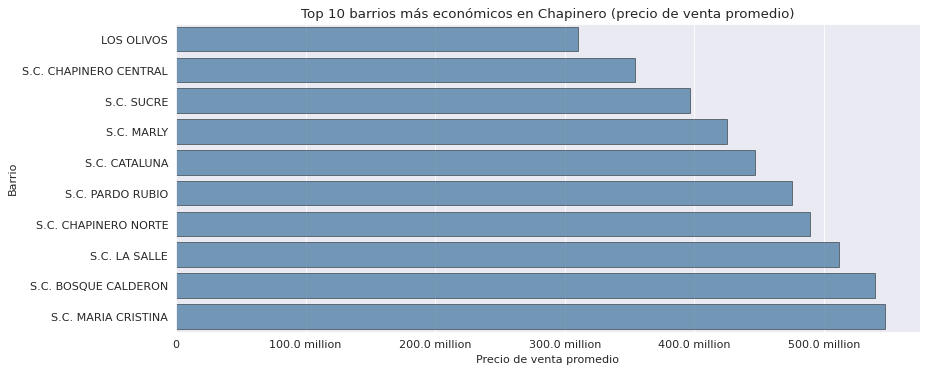

In [39]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_mean,
    y=top_barrios_economicos_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [40]:
top_barrios_economicos_median = top_barrios_economicos[top_barrios_economicos['count'] > 10].sort_values('median', ascending=True).head(10)
top_barrios_economicos_median.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LOS OLIVOS,19,310.2 million,245.0 million,222.5 million
S.C. CHAPINERO CENTRAL,239,354.2 million,320.0 million,168.6 million
S.C. MARLY,67,425.3 million,337.0 million,348.9 million
S.C. SUCRE,61,396.8 million,350.0 million,170.6 million
S.C. CATALUNA,21,446.8 million,410.0 million,215.1 million
S.C. PARDO RUBIO,135,475.8 million,420.0 million,356.6 million
S.C. CHAPINERO NORTE,80,489.2 million,455.0 million,212.6 million
S.C. LA SALLE,106,511.7 million,470.0 million,184.1 million
S.C. MARIA CRISTINA,101,546.8 million,489.0 million,271.2 million


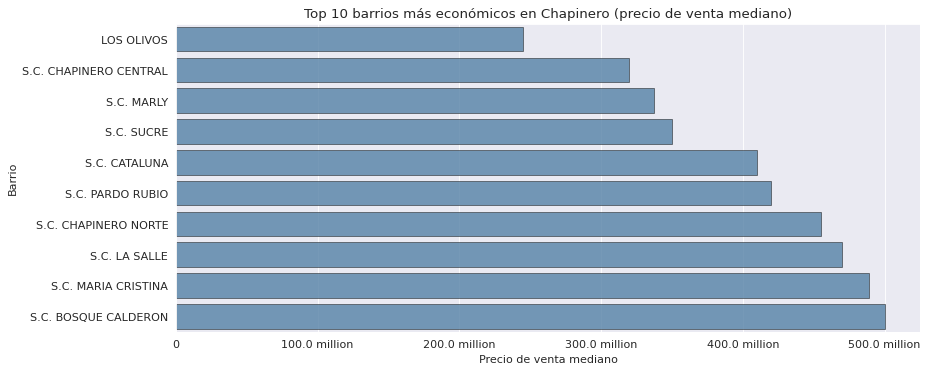

In [41]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos_median,
    y=top_barrios_economicos_median.index,
    x='median',
    color='steelblue',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Chapinero (precio de venta mediano)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Cercania a Transmilenio

In [42]:
chapinero.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

,count,mean,std,min,25%,50%,75%,max
is_cerca_estacion_tm,,,,,,,,
0,"8,446.0","1,520,187,134.5644093","861,486,186.5714366","180,000,000.0","849,400,000.0","1,375,000,000.0","2,000,000,000.0","4,009,225,000.0"
1,"1,916.0","901,739,920.9076201","649,503,034.5588444","150,000,000.0","459,999,999.75","715,000,000.0","1,150,000,000.0","4,000,000,000.0"


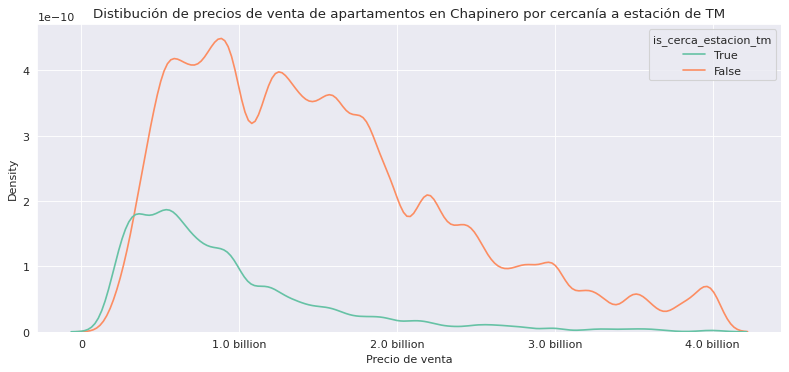

In [43]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

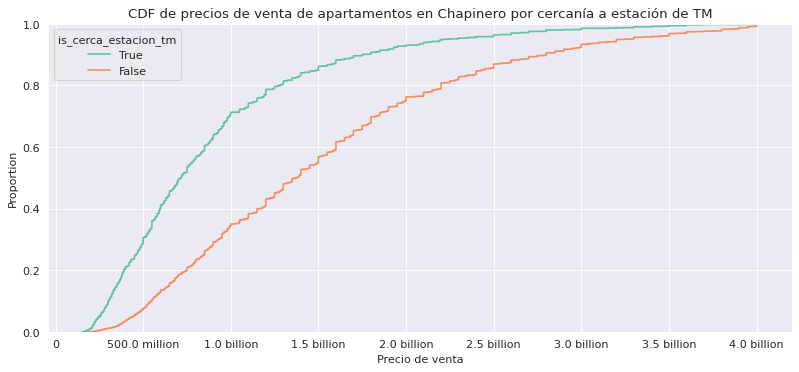

In [44]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [45]:
chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,9,1.9 billion,1.1 billion,660.0 million,850.0 million,1.8 billion,2.5 billion,3.8 billion
1.0,18,990.2 million,691.0 million,198.0 million,583.8 million,812.5 million,1.2 billion,2.8 billion
2.0,9,669.3 million,729.9 million,235.0 million,256.0 million,380.0 million,490.0 million,2.4 billion
3.0,221,373.6 million,213.1 million,175.0 million,260.0 million,320.0 million,390.0 million,1.8 billion
4.0,996,579.8 million,399.6 million,150.0 million,362.7 million,469.7 million,633.5 million,3.6 billion
5.0,1.0 thousand,1.1 billion,638.1 million,170.0 million,595.0 million,875.0 million,1.4 billion,4.0 billion
6.0,8.1 thousand,1.6 billion,844.6 million,229.0 million,904.4 million,1.4 billion,2.1 billion,4.0 billion


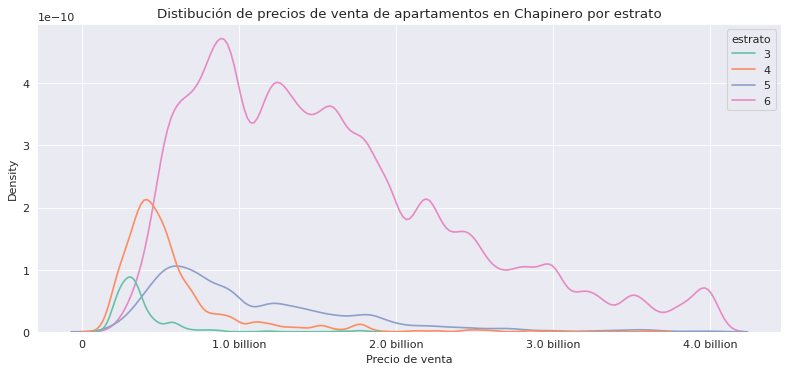

In [46]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

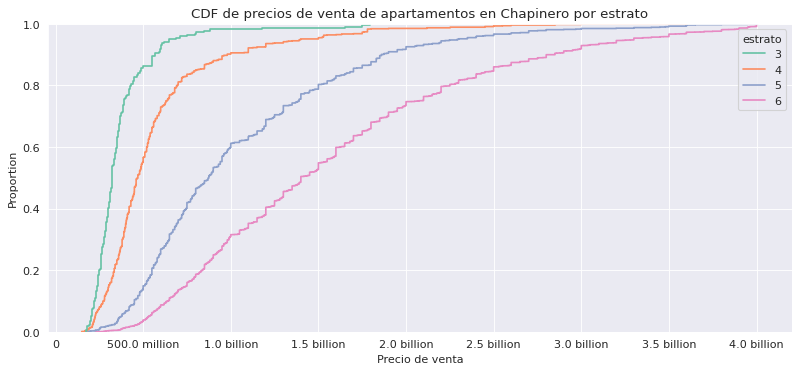

In [47]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [48]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'last_view',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'direccion', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

### Antiguedad del apartamento

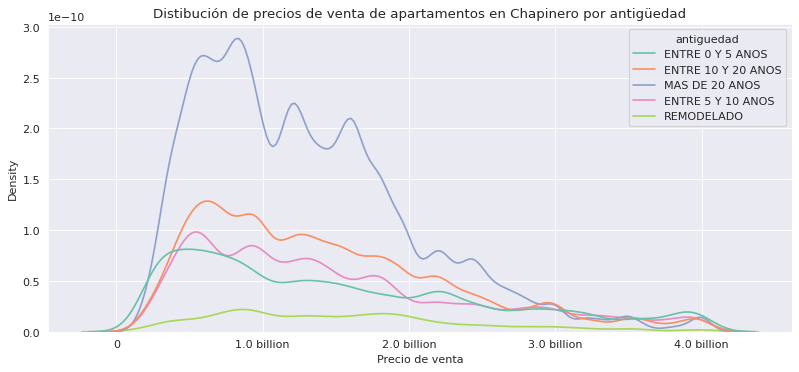

In [49]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

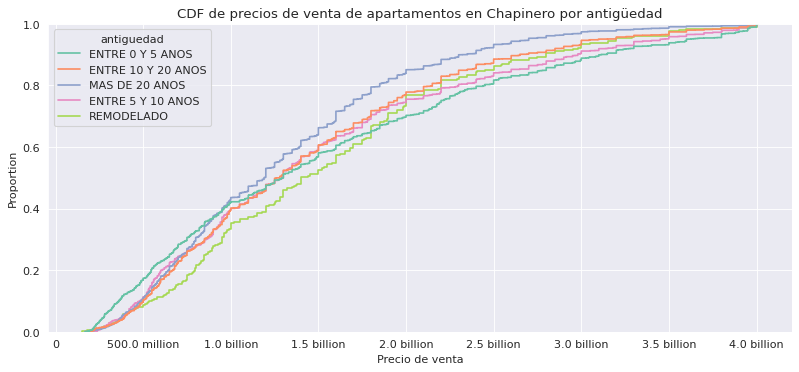

In [50]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [51]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Virrey,416,1.3 billion,779.7 million,217.0 million,666.0 million,970.0 million,1.7 billion,3.9 billion
Héroes - Gel´Hada,23,1.2 billion,1.2 billion,300.0 million,550.0 million,579.9 million,1.1 billion,4.0 billion
Calle 85,393,1.2 billion,632.8 million,361.0 million,650.0 million,998.0 million,1.5 billion,3.6 billion
Calle 100,515,907.7 million,478.6 million,255.0 million,590.0 million,830.0 million,1.1 billion,3.7 billion
Calle 72,25,676.8 million,281.2 million,219.0 million,487.0 million,609.5 million,820.0 million,1.4 billion
Flores,37,642.9 million,370.2 million,243.1 million,420.0 million,520.0 million,750.0 million,1.9 billion
Calle 76 - San Felipe,50,638.4 million,389.4 million,190.0 million,363.8 million,590.0 million,770.0 million,2.0 billion
Calle 45,78,415.3 million,189.4 million,167.0 million,270.0 million,357.5 million,591.0 million,1.1 billion
Marly,74,411.9 million,328.3 million,150.0 million,286.2 million,343.5 million,450.0 million,2.9 billion


In [52]:
estacion_tm_cercana_stats_mean = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)
estacion_tm_cercana_stats_median = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('50%', ascending=False)

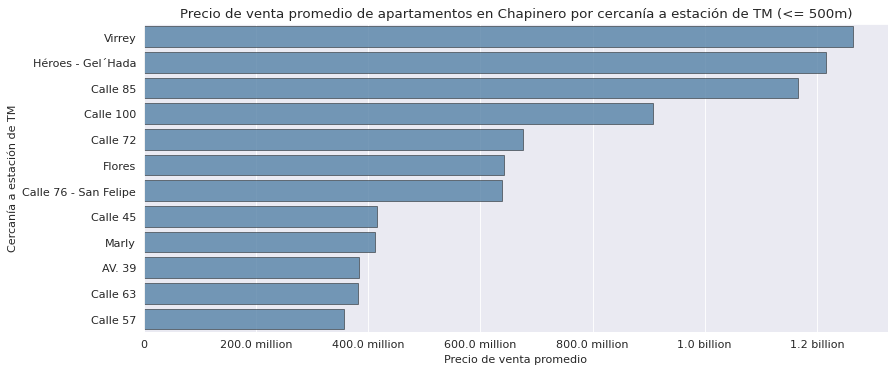

In [53]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_mean,
    y=estacion_tm_cercana_stats_mean.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

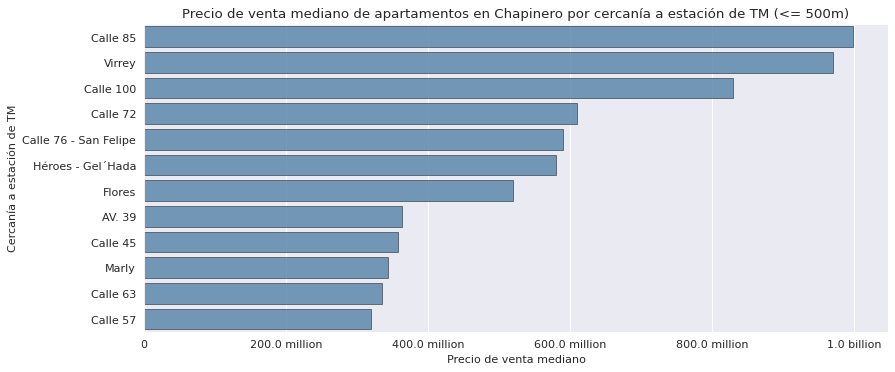

In [54]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats_median,
    y=estacion_tm_cercana_stats_median.index,
    x='50%',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.5,
    alpha=.8,
)

plt.title('Precio de venta mediano de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta mediano')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

<Figure size 960x400 with 0 Axes>

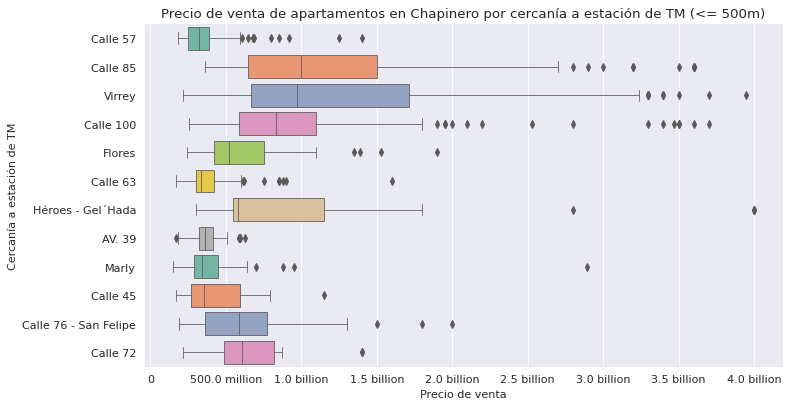

In [69]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='precio_venta',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Precio de venta de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Precios Anteriores Vs Actuales

In [70]:
#selcionar todos los datos qut no tenga la columna precio_venta_anterior nula
chapinero_ant = chapinero[chapinero['precio_venta_anterior'].notna()]
chapinero_ant = chapinero_ant[chapinero_ant['fecha_actualizacion_precio_venta'].dt.month == 10]
chapinero_ant.shape

(138, 39)

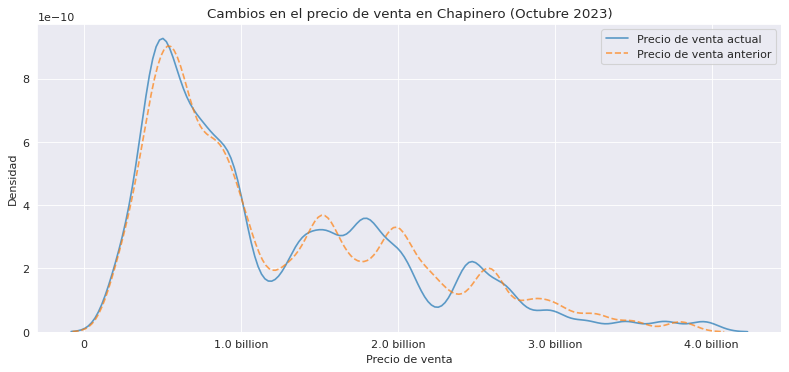

In [71]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero_ant,
    x='precio_venta',
    bw_adjust=.3,
    label='Precio de venta actual',
    alpha=.7,
)

sns.kdeplot(
    chapinero_ant,
    x='precio_venta_anterior',
    bw_adjust=.3,
    label='Precio de venta anterior',
    alpha=.7,
    linestyle='--',
)

plt.title('Cambios en el precio de venta en Chapinero (Octubre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

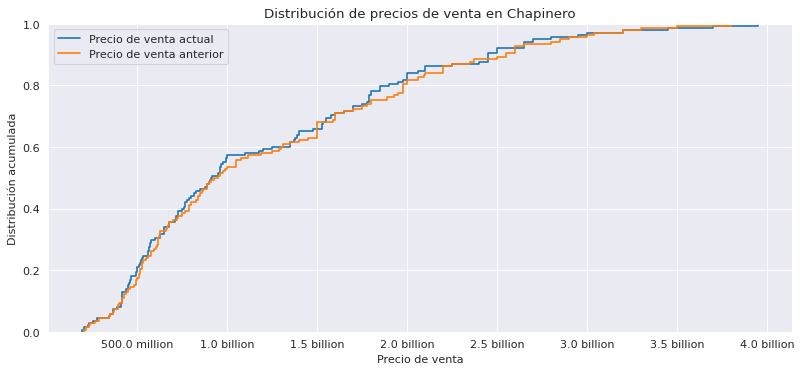

In [72]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta',
    label='Precio de venta actual',
)

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta_anterior',
    label='Precio de venta anterior',
    # alpha=.7
)

plt.title('Distribución de precios de venta en Chapinero')
plt.xlabel('Precio de venta')
plt.ylabel('Distribución acumulada')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

In [73]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,138,1.2 billion,828.6 million,195.0 million,560.0 million,915.0 million,1.8 billion,4.0 billion


In [74]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x))

count              138
mean       1.2 billion
std      828.6 million
min      195.0 million
25%      560.0 million
50%      915.0 million
75%        1.8 billion
max        4.0 billion
Name: precio_venta, dtype: object

In [75]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta_anterior,138,1.2 billion,832.5 million,205.0 million,579.2 million,940.0 million,1.8 billion,3.8 billion


In [76]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x))

count              138
mean       1.2 billion
std      832.5 million
min      205.0 million
25%      579.2 million
50%      940.0 million
75%        1.8 billion
max        3.8 billion
Name: precio_venta_anterior, dtype: object

## Antiguedad

In [77]:
chapinero.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        4439
ENTRE 10 Y 20 ANOS    2233
ENTRE 5 Y 10 ANOS     1695
ENTRE 0 Y 5 ANOS      1587
REMODELADO             403
Name: count, dtype: int64

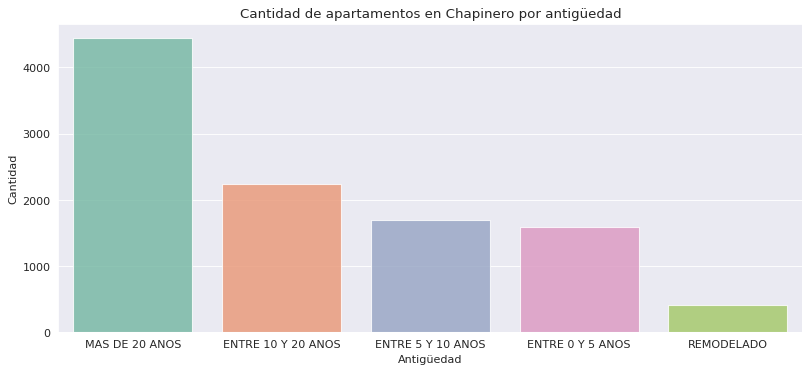

In [78]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    # edgecolor='black',
    # linewidth=.5,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [79]:
chapinero.groupby('antiguedad')['barrio'].describe()

,count,unique,top,freq
antiguedad,,,,
ENTRE 0 Y 5 ANOS,1587,53,S.C. CHICO NORTE,201
ENTRE 10 Y 20 ANOS,2233,66,S.C. CHICO NORTE,299
ENTRE 5 Y 10 ANOS,1695,63,S.C. CHICO NORTE,220
MAS DE 20 ANOS,4439,72,S.C. CHICO NORTE,457
REMODELADO,403,49,S.C. BELLAVISTA,49


In [80]:
chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1587.0,131.6,78.3,1.0,65.0,122.6,179.0,404.0
ENTRE 10 Y 20 ANOS,2233.0,167.6,85.5,8.0,98.0,159.0,228.0,417.0
ENTRE 5 Y 10 ANOS,1695.0,153.0,81.5,6.9,84.0,140.0,205.0,412.0
MAS DE 20 ANOS,4439.0,183.3,84.1,4.0,117.0,172.0,240.0,423.0
REMODELADO,403.0,194.2,90.6,26.0,125.5,194.0,250.0,425.0


In [81]:
chapinero.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

,count,unique,top,freq
barrio,,,,
S.C. CHICO NORTE,1220,5,MAS DE 20 ANOS,457
LOS ROSALES,950,5,MAS DE 20 ANOS,454
S.C. EL CHICO,949,5,MAS DE 20 ANOS,312
S.C. CHICO NORTE III SECTOR,910,5,MAS DE 20 ANOS,426
S.C. BELLAVISTA,673,5,MAS DE 20 ANOS,369
LA CABRERA,505,5,MAS DE 20 ANOS,238
S.C. ANTIGUO COUNTRY,477,5,ENTRE 0 Y 5 ANOS,156
S.C. EL NOGAL,421,5,MAS DE 20 ANOS,276
CHICO RESERVADO,415,5,ENTRE 10 Y 20 ANOS,139


### Estrato

## Barrios

In [82]:
chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

,codigo
barrio,
S.C. CHICO NORTE,1221
LOS ROSALES,950
S.C. EL CHICO,949
S.C. CHICO NORTE III SECTOR,910
S.C. BELLAVISTA,675
LA CABRERA,505
S.C. ANTIGUO COUNTRY,477
S.C. EL NOGAL,421
CHICO RESERVADO,415


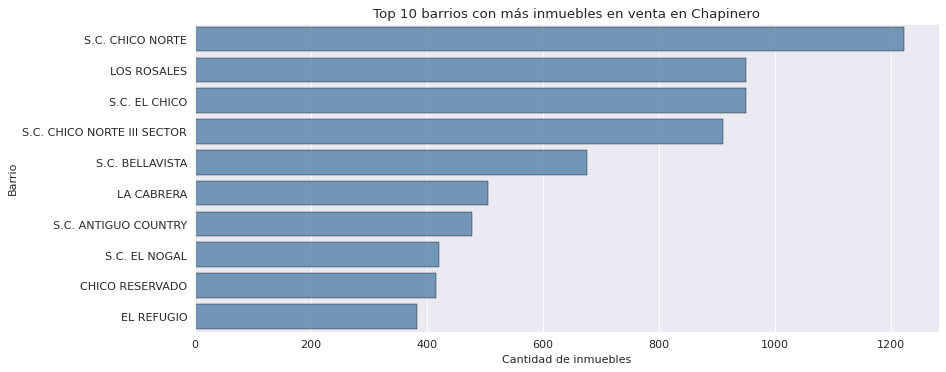

In [83]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Chapinero')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()